In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Conexión a BD
# ==============================================================================
import pyodbc

In [3]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


In [4]:
dFechaInicio = '2019-01-01'
dFechaFin = '2019-12-31'

In [5]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

In [6]:
dfPlaga =  df

In [7]:
## Revisando la mayor cantidad de evaluaciones por filtrado

In [8]:
for filtrado in df["Filtrado"].unique():
    print("Filtrado: " + filtrado)
    nCantidadFiltrado = df[df["Filtrado"] == filtrado].shape[0]
    print("Cantidad: " + str(nCantidadFiltrado))
filtradosEleg = ["17","20","10N"]
dfFilEleg = df[df["Filtrado"].isin(filtradosEleg)]   

Filtrado: 10N
Cantidad: 1854
Filtrado: 11N
Cantidad: 2320
Filtrado: 13
Cantidad: 2032
Filtrado: 15
Cantidad: 511
Filtrado: 16
Cantidad: 666
Filtrado: 17
Cantidad: 1059
Filtrado: 18
Cantidad: 376
Filtrado: 20
Cantidad: 1000
Filtrado: 22
Cantidad: 617
Filtrado: 29
Cantidad: 3529
Filtrado: 30
Cantidad: 2962
Filtrado: 9N
Cantidad: 51


In [9]:
filtradosEleg = ["17","20", "10N"]
dfFilEleg = dfPlaga[dfPlaga["Filtrado"].isin(filtradosEleg)]

In [10]:
dfFilEleg.head()

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje
0,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,BROTES,TRIPS TABACI,G° NINFAS Y ADULTOS,2,1,--,--
1,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),52,2,--,--
2,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),59,2,--,--
3,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),20,1,--,--
4,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,HEMIBERLESIA LATANIAE,G° INFEST. (ESCAMAS),3,3,--,--


In [11]:
dfFilEleg['Semana'] = pd.to_datetime(dfFilEleg['Fecha'], format='%Y-%m-%d').dt.weekofyear

In [12]:
dfFilEleg.head()

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje,Semana
0,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,BROTES,TRIPS TABACI,G° NINFAS Y ADULTOS,2,1,--,--,1
1,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),52,2,--,--,1
2,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),59,2,--,--,1
3,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),20,1,--,--,1
4,gmarin,2019-01-04,VIRU - PALTO,10N,F10N,1011,HOJAS,HEMIBERLESIA LATANIAE,G° INFEST. (ESCAMAS),3,3,--,--,1


In [13]:
data_weather = pd.ExcelFile('D:/Proyectos GitHub/Python/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [14]:
df_weather = df_weather[df_weather['Año'] == 2019]
df_weather = df_weather[(df_weather['Fecha'] >= dFechaInicio) & (df_weather['Fecha'] <= dFechaFin)]
df_weather.reset_index(drop = True, inplace = True)

In [15]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)','Semana']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM',
                                         'Semana': 'Semana'})

In [16]:
dfFilEleg = dfFilEleg[dfFilEleg["Plaga"] != "DAGBERTUS MINENSIS, DAGBERTUS PERUANUS"]

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1006
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-03  3.200  22.870000    187.1     86.0      3
1   2019-01-30  4.300  24.822917    228.9     83.0      4
2   2019-02-07  4.400  25.462500    259.2     84.0      5
3   2019-05-13  1.800  21.683333    106.3     85.0      5
4   2019-05-20  3.300  20.658333    207.5     84.0      5
5   2019-05-27  2.300  19.716667    148.5     87.0      5
6   2019-06-03  1.100  18.756250    187.1     90.0      4
7   2019-06-13  1.900  18.675000    233.7     89.0      4
8   2019-06-19  0.800  17.637500    179.1     85.0      2
9   2019-06-27  2.000  17.335417    267.0     89.0      2
10  2019-07-03  0.800  17.193750     57.3     89.0      2
11  2019-07-10  2.400  17.433333    160.6     

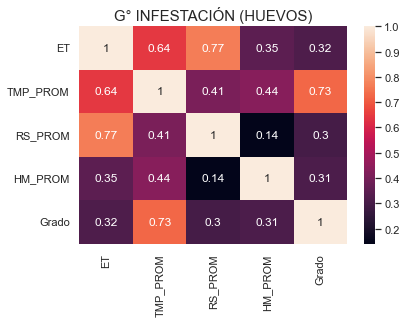

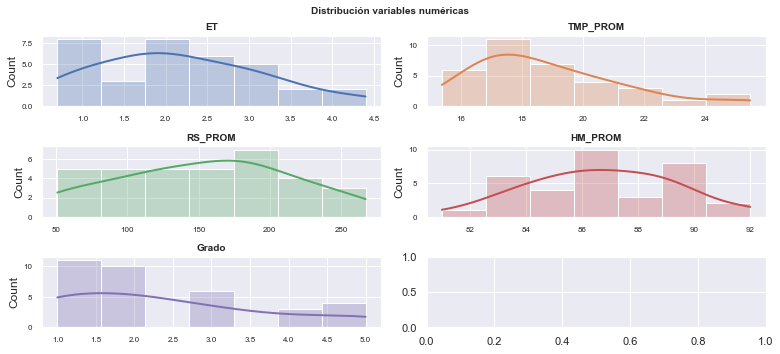

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1007
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-07  4.400  25.462500    259.2     84.0      4
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-20  3.300  20.658333    207.5     84.0      5
4   2019-05-27  2.300  19.716667    148.5     87.0      5
5   2019-06-03  1.100  18.756250    187.1     90.0      4
6   2019-06-13  1.900  18.675000    233.7     89.0      3
7   2019-06-19  0.800  17.637500    179.1     85.0      2
8   2019-06-25  2.400  18.539583    220.9     87.0      2
9   2019-07-03  0.800  17.193750     57.3     89.0      2
10  2019-07-10  2.400  17.433333    160.6     92.0      1
11  2019-07-15  2.700  18.033333    18

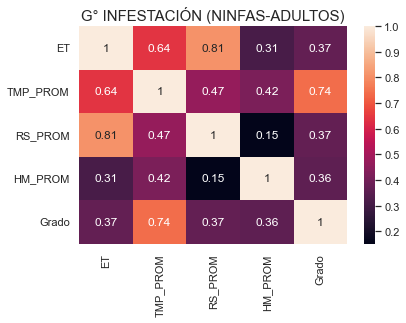

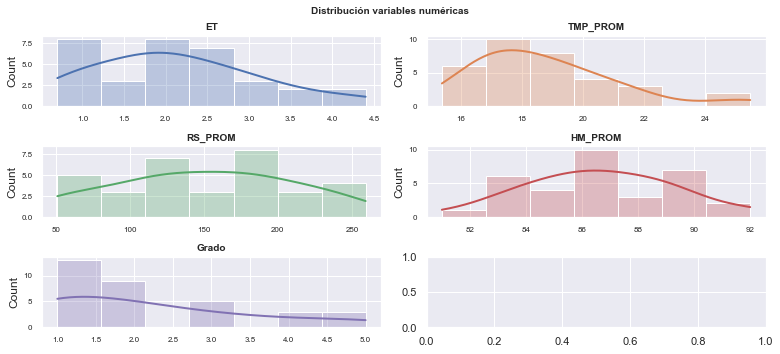

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-08  3.300  25.268750    184.1     83.0      4
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-20  3.300  20.658333    207.5     84.0      5
4   2019-05-25  3.100  20.750000    198.7     87.0      4
5   2019-05-27  2.300  19.716667    148.5     87.0      5
6   2019-06-03  1.100  18.756250    187.1     90.0      4
7   2019-06-13  1.900  18.675000    233.7     89.0      3
8   2019-06-19  0.800  17.637500    179.1     85.0      2
9   2019-06-25  2.400  18.539583    220.9     87.0      2
10  2019-07-03  0.800  17.193750     57.3     89.0      1
11  2019-07-10  2.400  17.433333    16

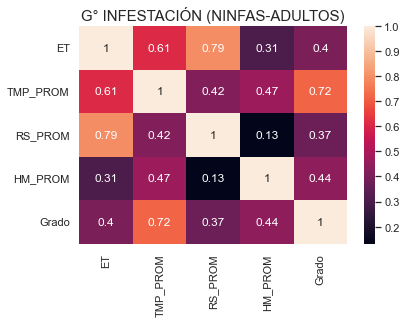

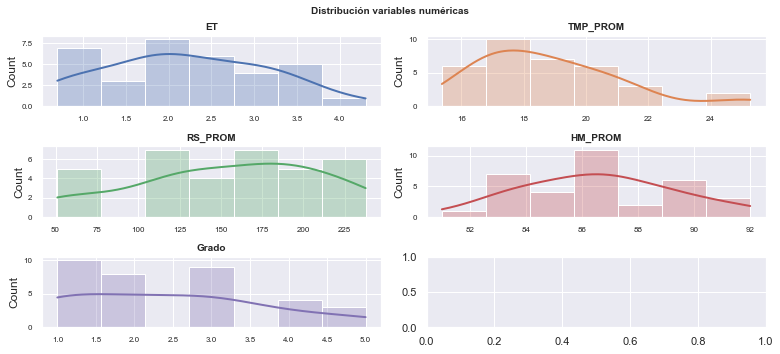

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-08  3.300  25.268750    184.1     83.0      4
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-20  3.300  20.658333    207.5     84.0      5
4   2019-05-25  3.100  20.750000    198.7     87.0      4
5   2019-05-27  2.300  19.716667    148.5     87.0      5
6   2019-06-03  1.100  18.756250    187.1     90.0      4
7   2019-06-13  1.900  18.675000    233.7     89.0      3
8   2019-06-19  0.800  17.637500    179.1     85.0      3
9   2019-06-25  2.400  18.539583    220.9     87.0      3
10  2019-07-03  0.800  17.193750     57.3     89.0      2
11  2019-07-10  2.400  17.433333    160.6     

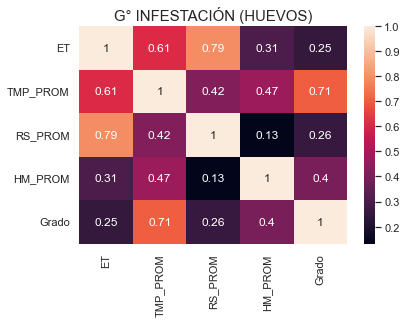

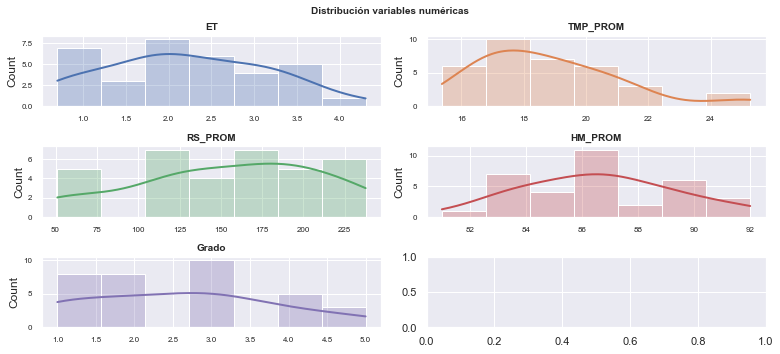

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-07  4.400  25.462500    259.2     84.0      4
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-20  3.300  20.658333    207.5     84.0      5
4   2019-05-27  2.300  19.716667    148.5     87.0      5
5   2019-06-03  1.100  18.756250    187.1     90.0      4
6   2019-06-13  1.900  18.675000    233.7     89.0      3
7   2019-06-19  0.800  17.637500    179.1     85.0      2
8   2019-06-25  2.400  18.539583    220.9     87.0      2
9   2019-07-03  0.800  17.193750     57.3     89.0      2
10  2019-07-10  2.400  17.433333    160.6     92.0      1
11  2019-07-15  2.700  18.033333    18

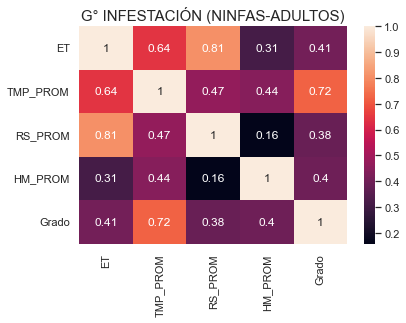

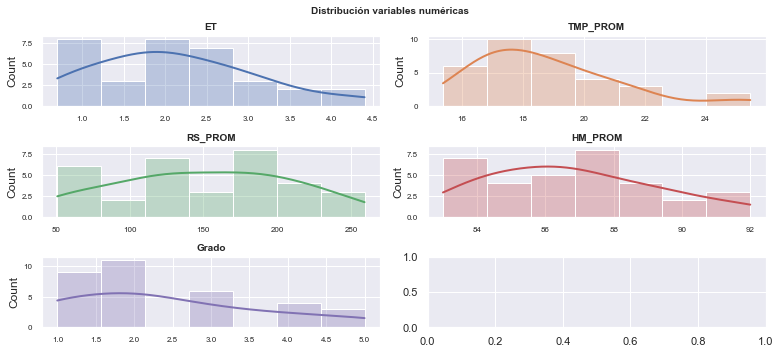

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-07  4.400  25.462500    259.2     84.0      5
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-20  3.300  20.658333    207.5     84.0      5
4   2019-05-27  2.300  19.716667    148.5     87.0      5
5   2019-06-03  1.100  18.756250    187.1     90.0      4
6   2019-06-13  1.900  18.675000    233.7     89.0      3
7   2019-06-19  0.800  17.637500    179.1     85.0      2
8   2019-06-25  2.400  18.539583    220.9     87.0      3
9   2019-07-03  0.800  17.193750     57.3     89.0      2
10  2019-07-10  2.400  17.433333    160.6     92.0      1
11  2019-07-15  2.700  18.033333    180.9     

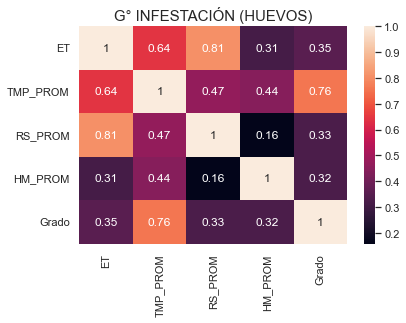

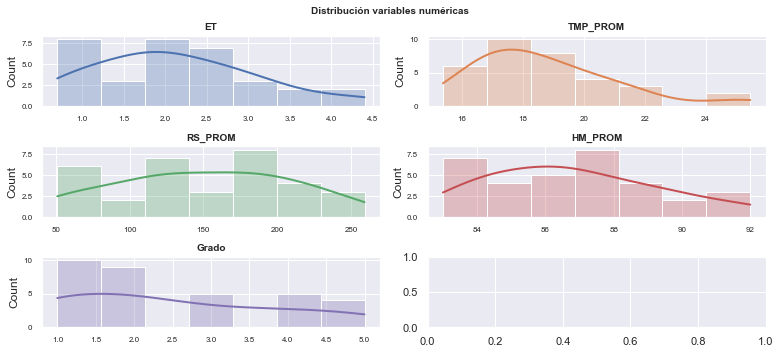

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1028
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-07  4.400  25.462500    259.2     84.0      5
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-20  3.300  20.658333    207.5     84.0      5
4   2019-05-27  2.300  19.716667    148.5     87.0      5
5   2019-06-03  1.100  18.756250    187.1     90.0      4
6   2019-06-13  1.900  18.675000    233.7     89.0      3
7   2019-06-19  0.800  17.637500    179.1     85.0      2
8   2019-06-25  2.400  18.539583    220.9     87.0      2
9   2019-07-03  0.800  17.193750     57.3     89.0      2
10  2019-07-10  2.400  17.433333    160.6     92.0      1
11  2019-07-15  2.700  18.033333    180.9     

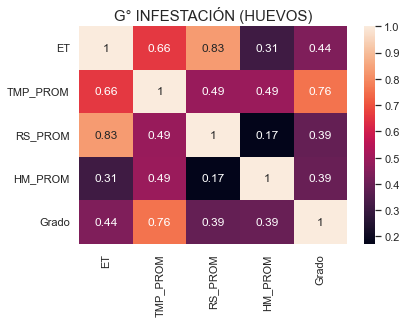

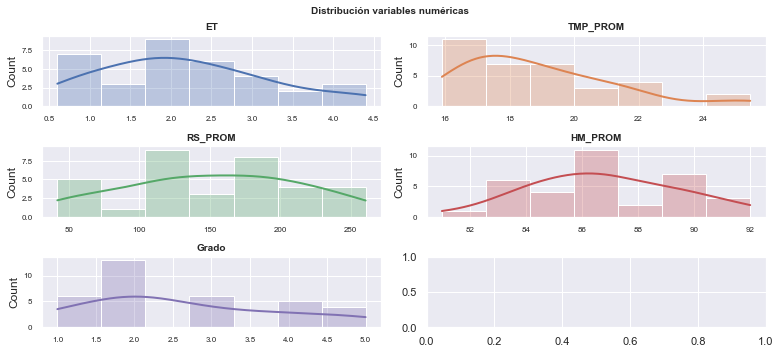

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1029
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      4
1   2019-02-05  2.200  25.026190    154.7     76.0      3
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-22  2.800  20.731250    173.3     83.0      3
4   2019-05-28  3.000  19.681250    191.3     84.0      4
5   2019-06-06  2.400  20.245833    115.1     88.0      3
6   2019-06-19  0.800  17.637500    179.1     85.0      2
7   2019-06-25  2.400  18.539583    220.9     87.0      2
8   2019-07-03  0.800  17.193750     57.3     89.0      1
9   2019-07-10  2.400  17.433333    160.6     92.0      1
10  2019-07-15  2.700  18.033333    180.9     86.0      1
11  2019-07-24  1.000  16.689583     6

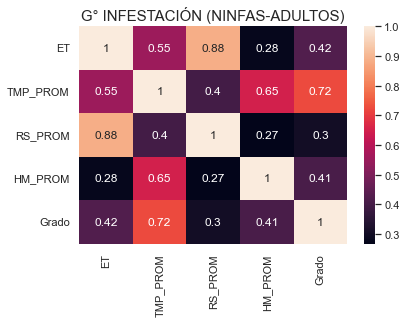

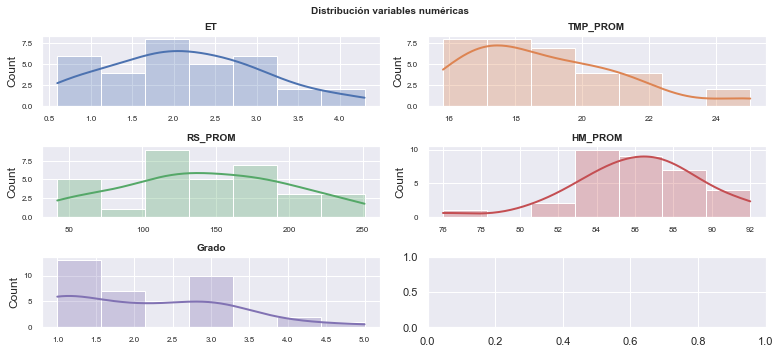

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1029
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      5
1   2019-02-05  2.200  25.026190    154.7     76.0      3
2   2019-05-13  1.800  21.683333    106.3     85.0      5
3   2019-05-22  2.800  20.731250    173.3     83.0      3
4   2019-05-28  3.000  19.681250    191.3     84.0      4
5   2019-06-06  2.400  20.245833    115.1     88.0      3
6   2019-06-19  0.800  17.637500    179.1     85.0      2
7   2019-06-25  2.400  18.539583    220.9     87.0      2
8   2019-07-03  0.800  17.193750     57.3     89.0      2
9   2019-07-10  2.400  17.433333    160.6     92.0      2
10  2019-07-15  2.700  18.033333    180.9     86.0      1
11  2019-07-24  1.000  16.689583     65.6     

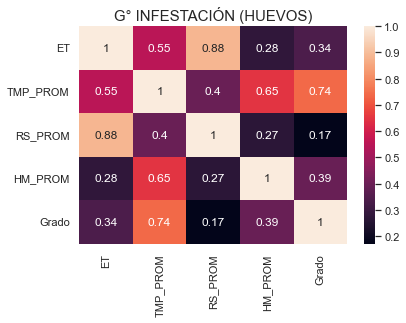

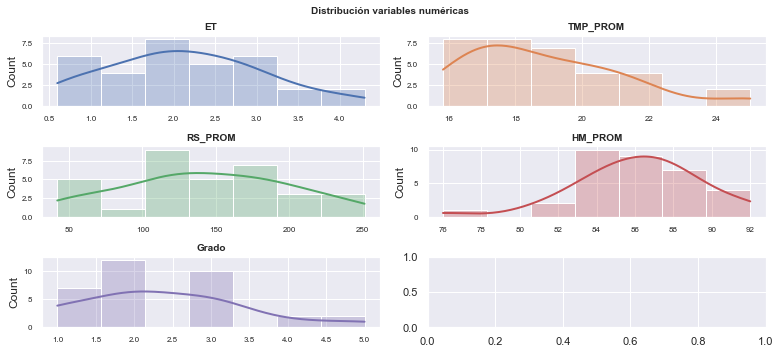

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1010
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-01-30  4.300  24.822917    228.9     83.0      3
1   2019-02-05  2.200  25.026190    154.7     76.0      3
2   2019-05-14  2.800  21.635417    179.4     84.0      5
3   2019-05-21  2.800  19.954167    176.1     84.0      3
4   2019-05-28  3.000  19.681250    191.3     84.0      4
5   2019-06-06  2.400  20.245833    115.1     88.0      3
6   2019-06-20  1.300  17.925000    240.4     89.0      3
7   2019-06-25  2.400  18.539583    220.9     87.0      2
8   2019-07-03  0.800  17.193750     57.3     89.0      1
9   2019-07-10  2.400  17.433333    160.6     92.0      1
10  2019-07-15  2.700  18.033333    180.9     86.0      1
11  2019-07-24  1.000  16.689583     6

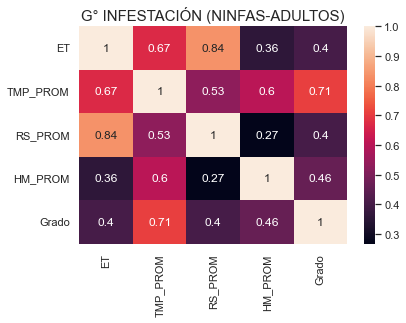

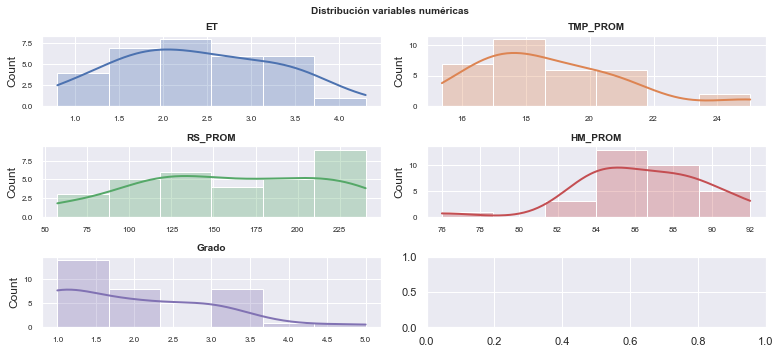

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-02-05  2.200  25.026190    154.7     76.0      3
1   2019-05-14  2.800  21.635417    179.4     84.0      5
2   2019-05-21  2.800  19.954167    176.1     84.0      4
3   2019-05-28  3.000  19.681250    191.3     84.0      4
4   2019-06-06  2.400  20.245833    115.1     88.0      3
5   2019-06-20  1.300  17.925000    240.4     89.0      2
6   2019-06-25  2.400  18.539583    220.9     87.0      2
7   2019-07-03  0.800  17.193750     57.3     89.0      1
8   2019-07-10  2.400  17.433333    160.6     92.0      1
9   2019-07-15  2.700  18.033333    180.9     86.0      1
10  2019-07-24  1.000  16.689583     65.6     88.0      1
11  2019-08-16  1.500  16.552083    11

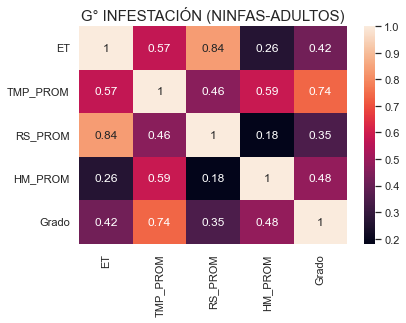

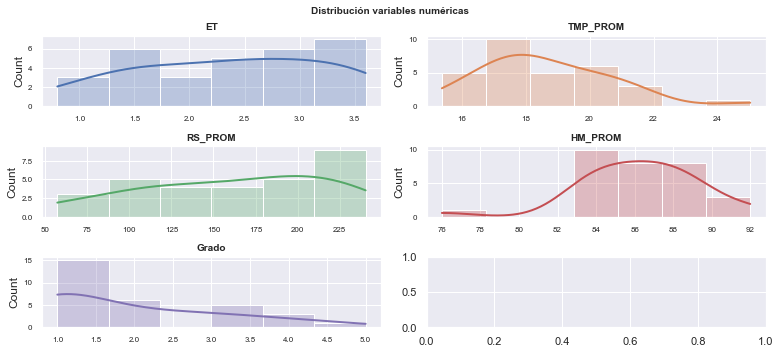

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1016
Plaga:  TRIPS TABACI
Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-08-29  1.700  17.204167    112.5     90.0      1
1   2019-09-12  1.900  16.829167    132.7     88.0      1
2   2019-09-21  0.800  15.377083     57.3     86.0      1
3   2019-09-27  1.300  16.604167     91.5     85.0      1
4   2019-10-03  2.400  17.608333    157.6     88.0      1
5   2019-10-12  2.900  17.714583    194.1     83.0      1
6   2019-10-18  1.800  18.200000    105.7     85.0      1
7   2019-10-21  1.200  17.222917     76.9     84.0      1
8   2019-11-01  3.600  19.012500    237.6     87.0      3
9   2019-11-08  3.400  18.879167    216.0     87.0      2
10  2019-11-13  3.000  19.583333    190.9     86.0      3
11  2019-11-23  2.032  19.658333    125.8     85.0      1


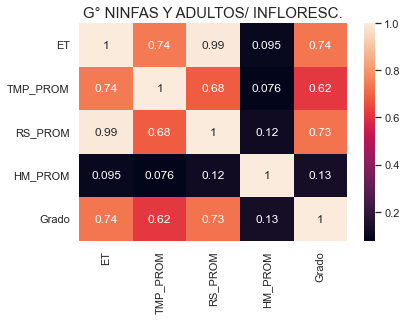

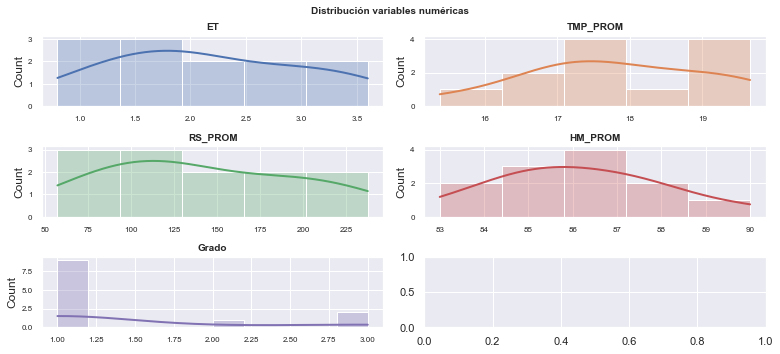

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1721
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-25  3.100  17.679167    210.8     82.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      3


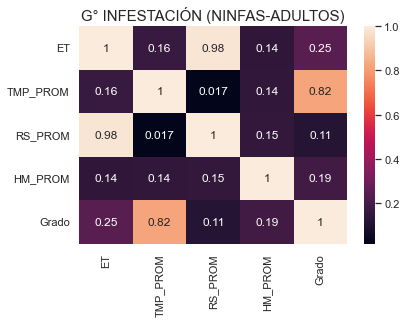

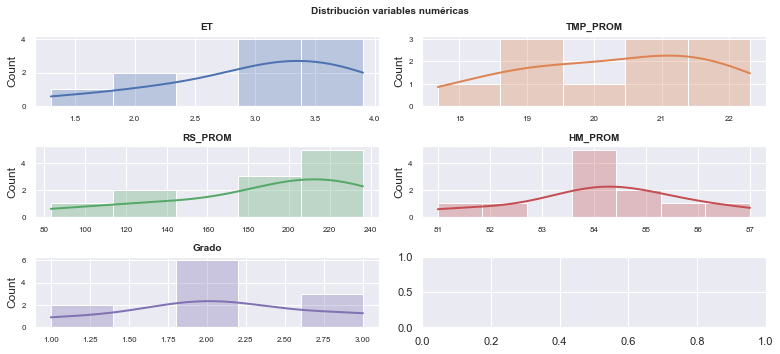

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1706
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-25  3.100  17.679167    210.8     82.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      1
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-31  3.700  22.812500    257.8     83.0      3


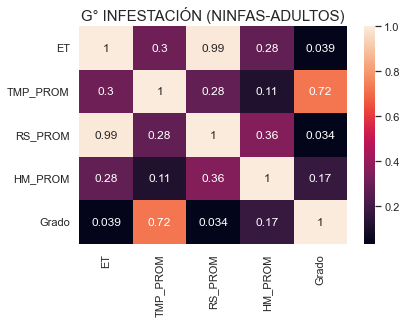

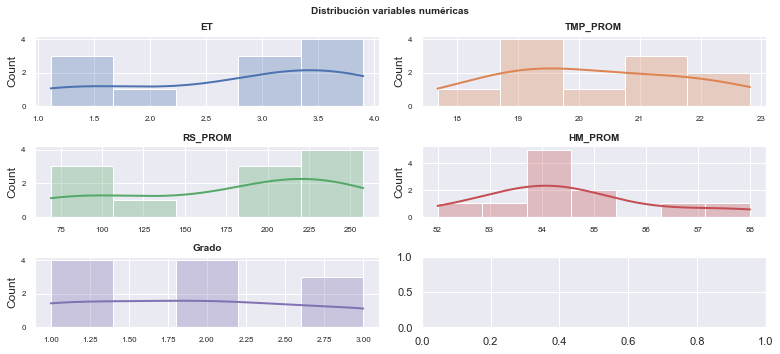

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1706
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-25  3.100  17.679167    210.8     82.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      1
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-31  3.700  22.812500    257.8     83.0      4


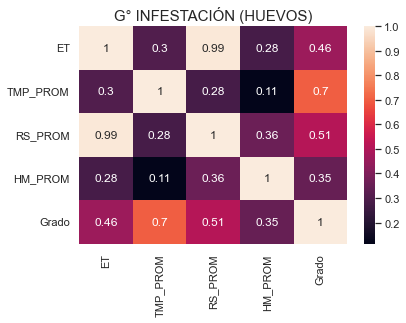

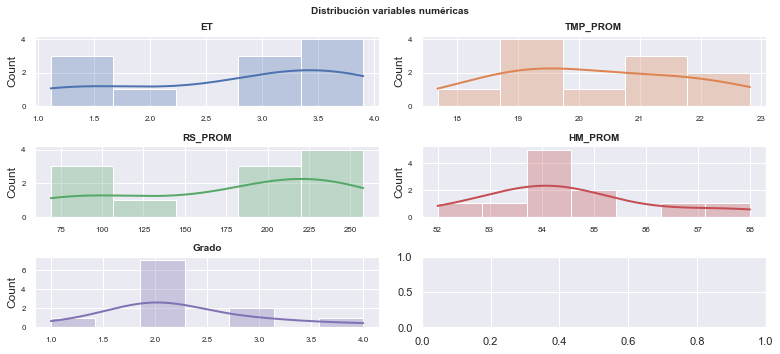

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1707
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-25  3.100  17.679167    210.8     82.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      1
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-31  3.700  22.812500    257.8     83.0      4


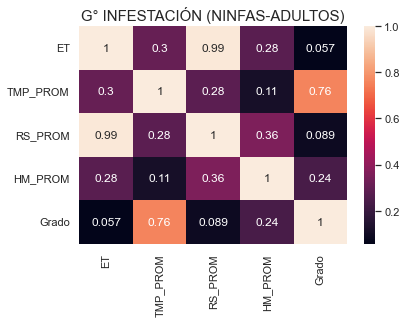

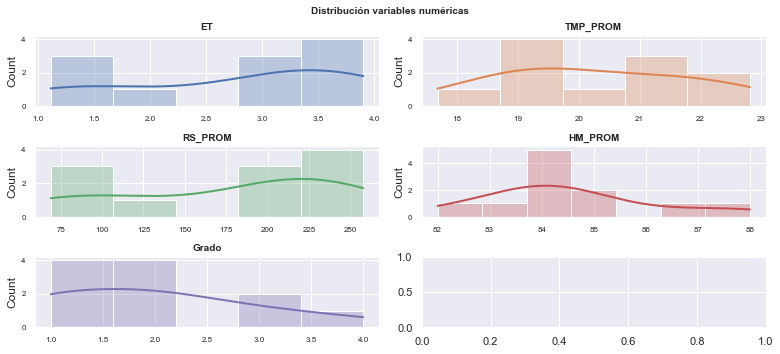

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1707
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-25  3.100  17.679167    210.8     82.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-31  3.700  22.812500    257.8     83.0      4


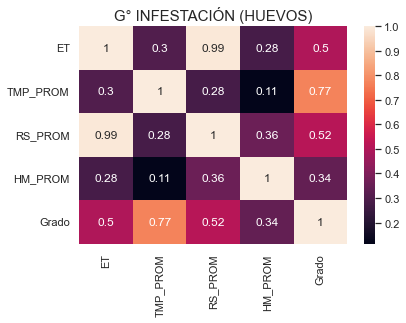

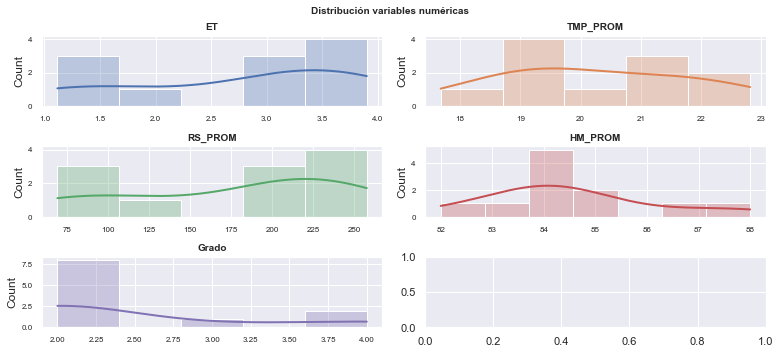

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1708
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      1
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      4


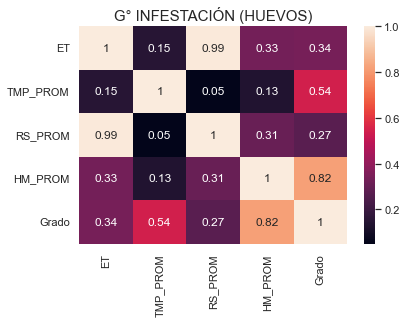

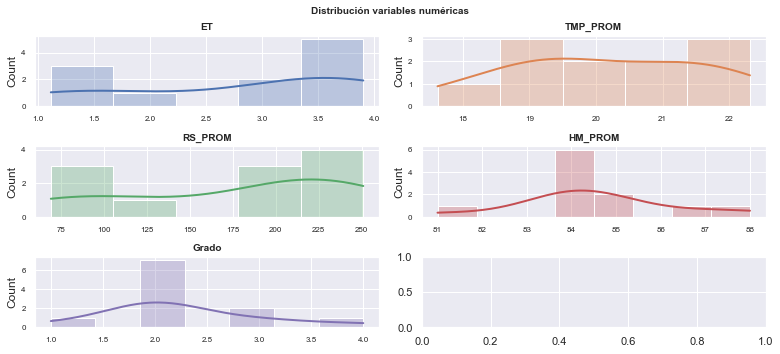

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1718
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      1
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      3


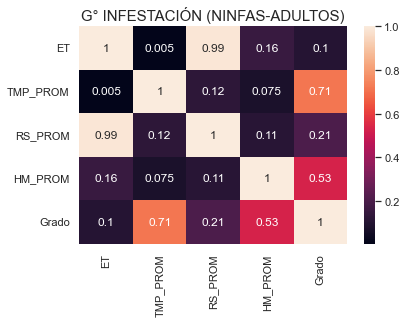

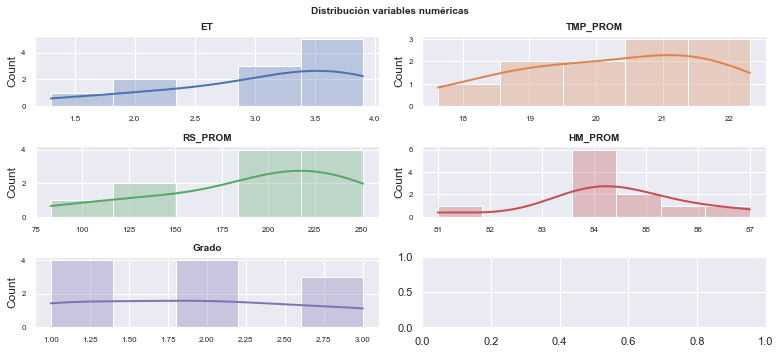

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1718
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      3


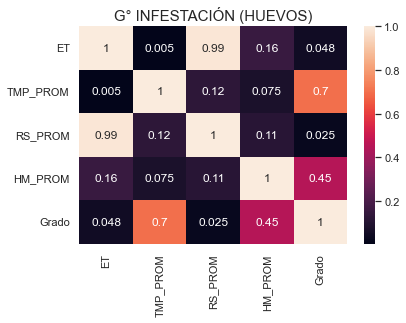

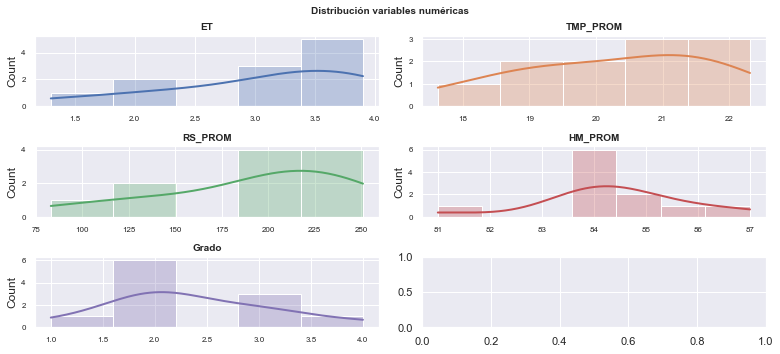

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1724
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      1
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      3


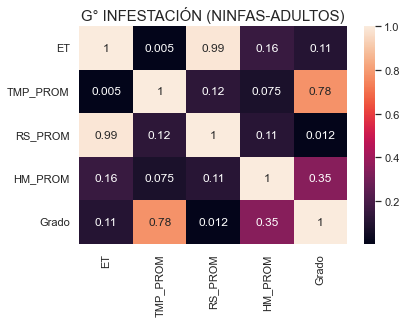

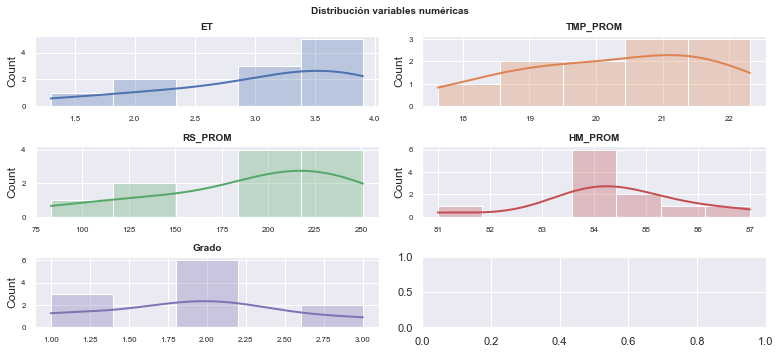

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1709
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      1
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-31  3.700  22.812500    257.8     83.0      3


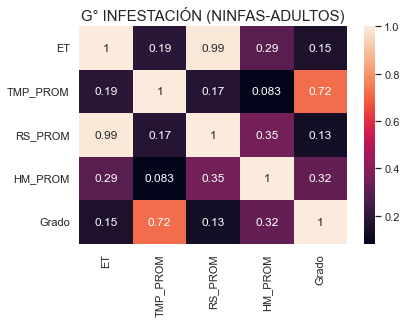

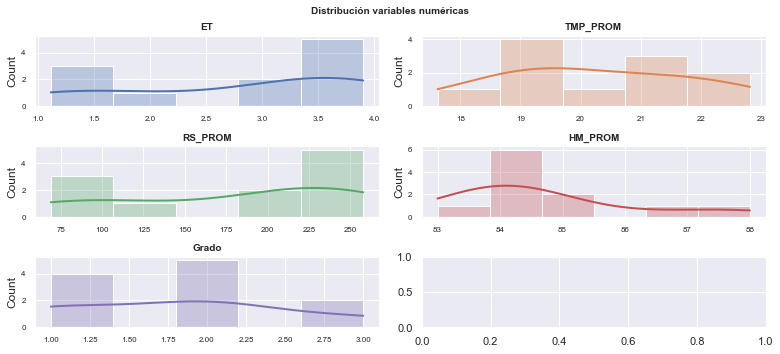

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1709
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-31  3.700  22.812500    257.8     83.0      4


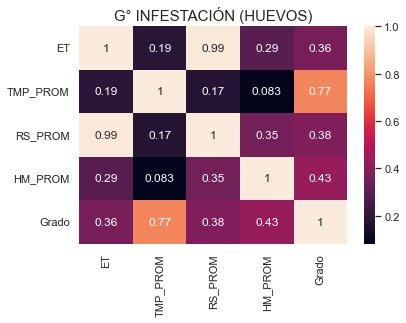

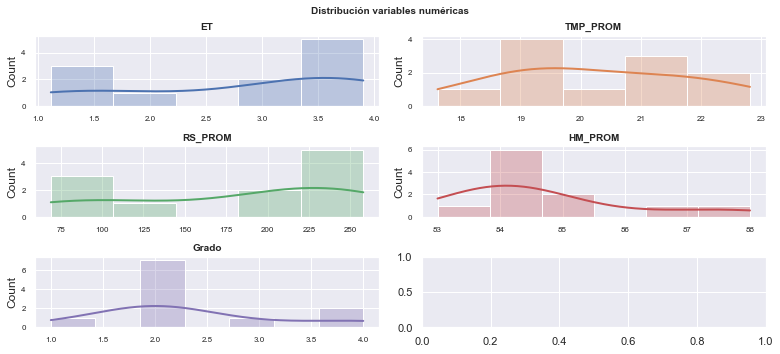

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1711
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      1
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      1
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      3


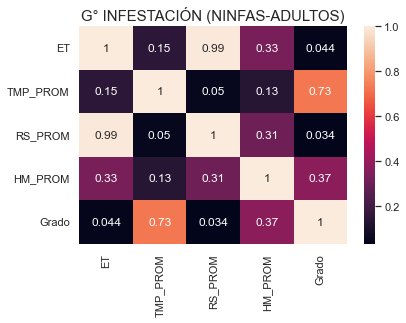

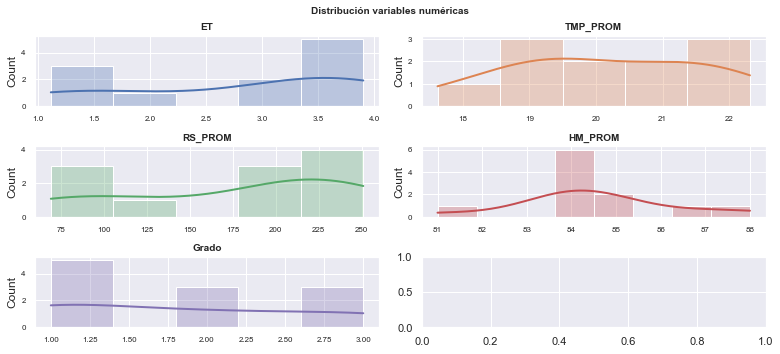

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1701
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      2
10  2019-12-31  3.700  22.812500    257.8     83.0      3


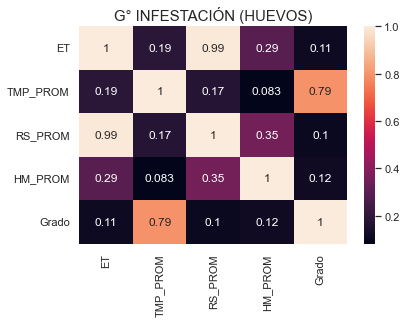

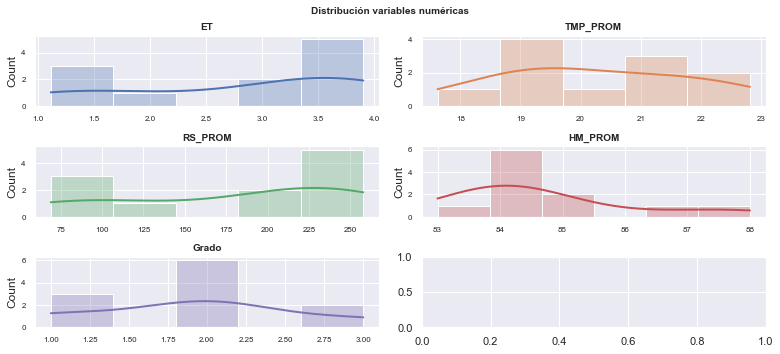

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1715
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      3


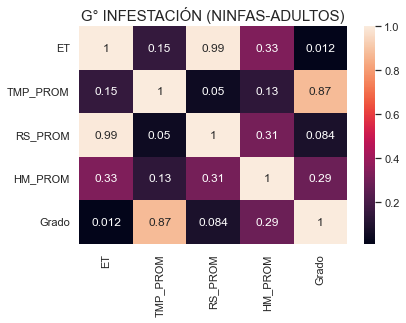

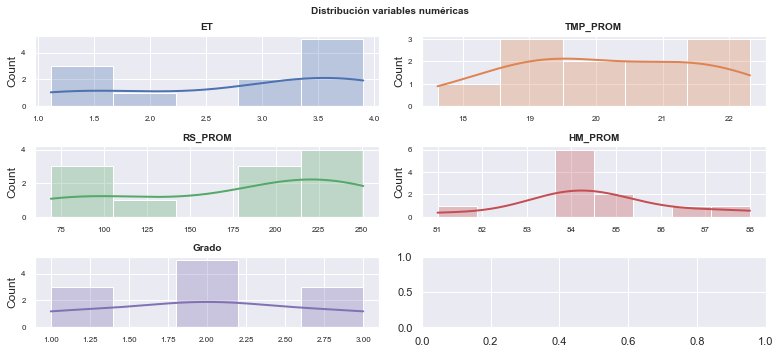

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1715
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-22  1.422  19.366667     92.4     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      4


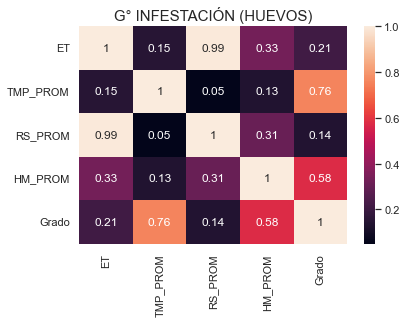

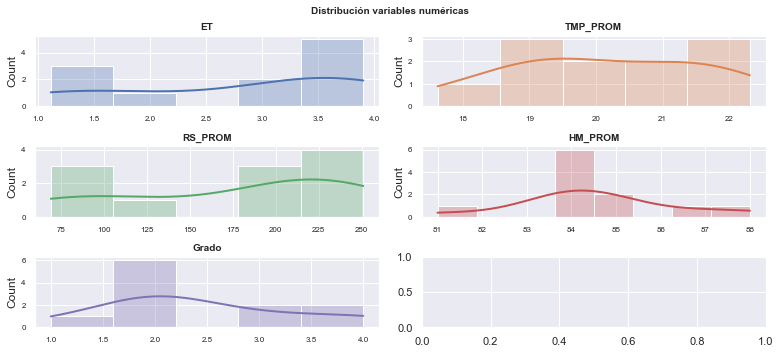

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1716
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      4


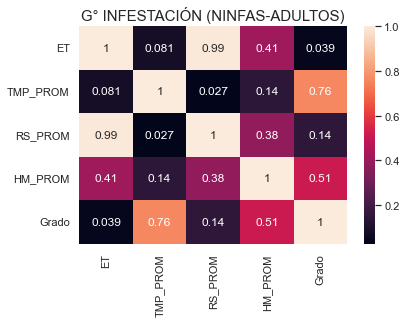

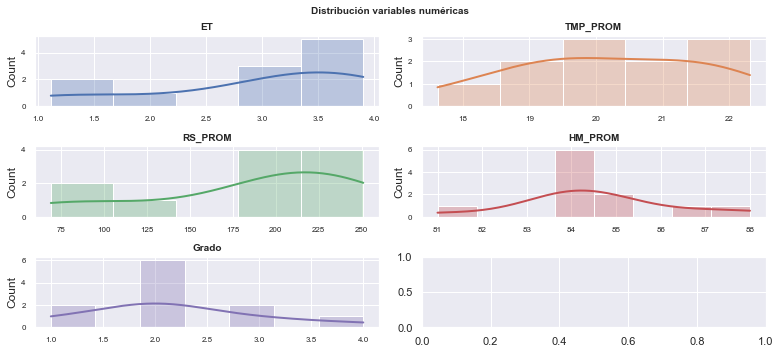

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1719
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      1
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      3


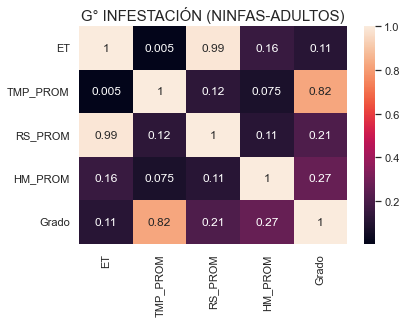

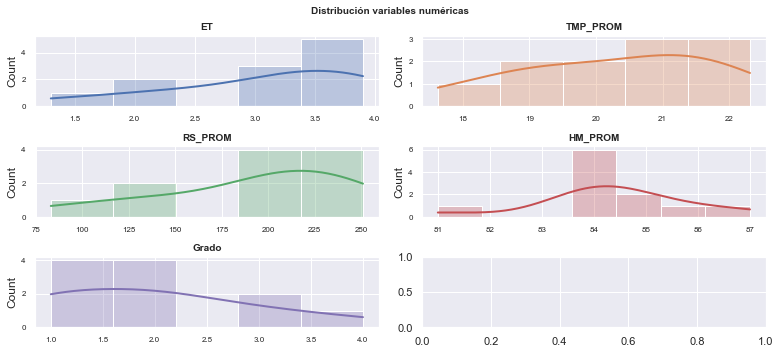

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1719
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      2
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      3


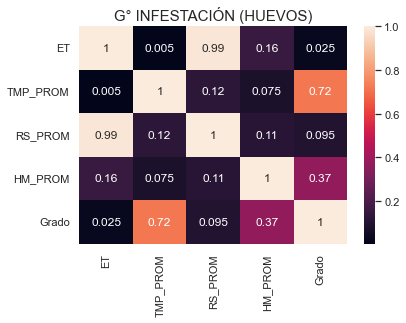

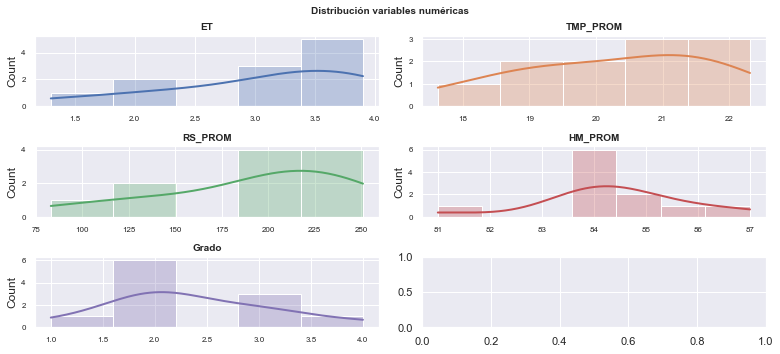

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1713
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      1
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      1
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      3


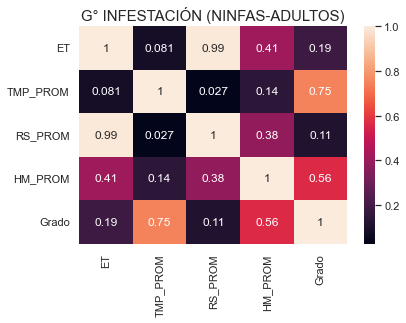

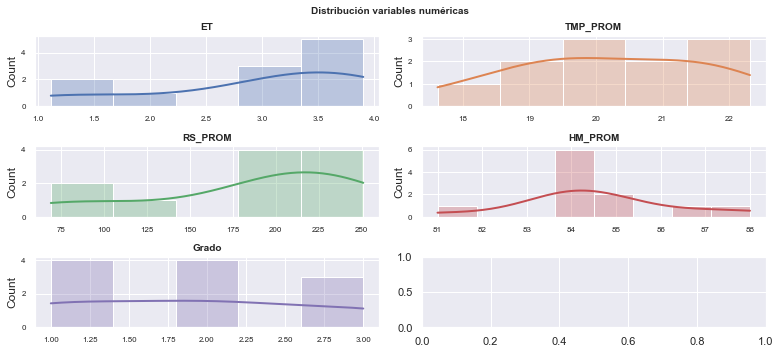

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1713
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-25  1.118  19.900000     69.0     88.0      1
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      3
10  2019-12-30  3.700  21.808333    213.7     81.0      4


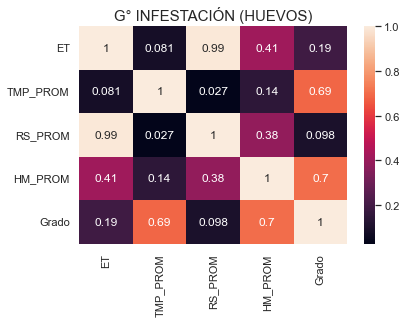

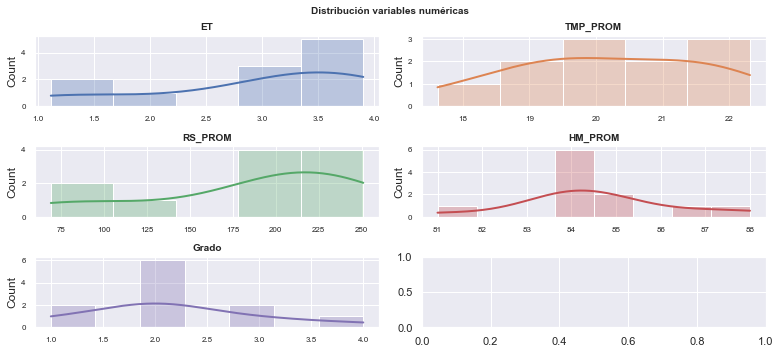

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1720
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      4
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      4


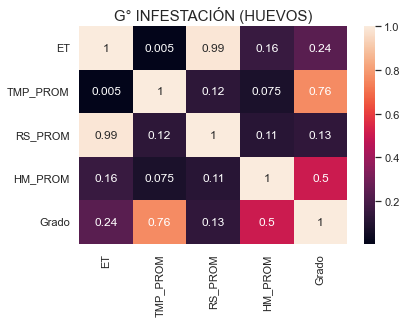

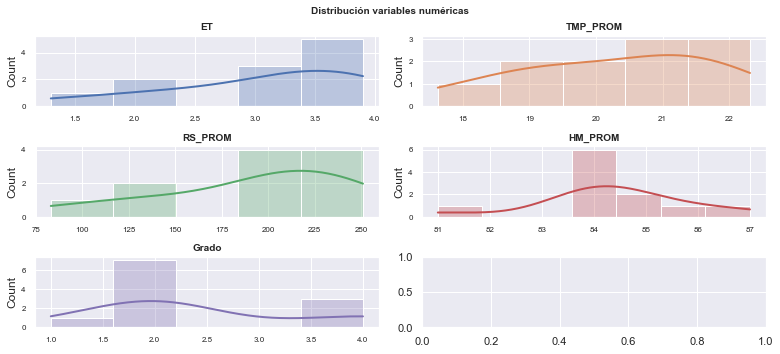

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1722
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      2
2   2019-11-07  3.600  18.710417    231.0     84.0      1
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      3
8   2019-12-20  3.100  21.218750    192.5     84.0      2
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      2


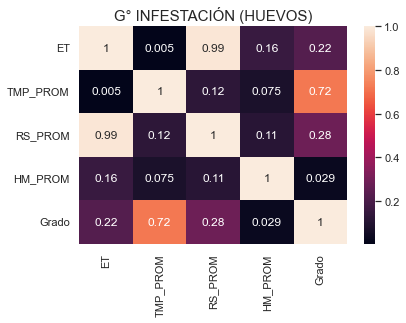

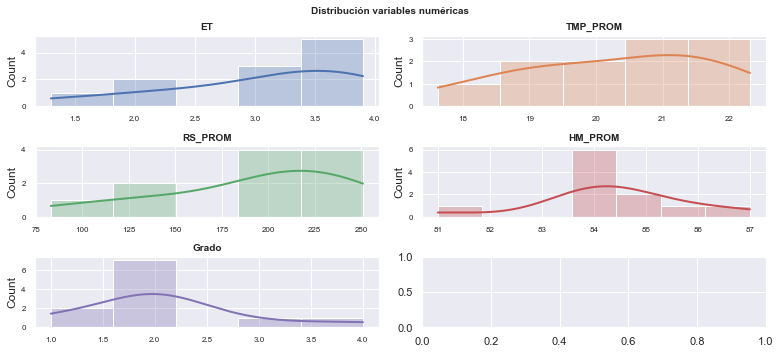

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1723
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2019-10-24  3.800  17.622917    251.0     84.0      1
1   2019-10-31  3.100  18.947917    201.4     85.0      1
2   2019-11-07  3.600  18.710417    231.0     84.0      2
3   2019-11-12  2.200  19.502083    135.0     85.0      2
4   2019-11-21  3.048  19.785417    189.9     84.0      2
5   2019-11-27  2.200  20.829167    135.6     86.0      2
6   2019-12-05  3.900  21.593750    236.3     87.0      2
7   2019-12-12  1.300  20.789583     83.2     84.0      2
8   2019-12-20  3.100  21.218750    192.5     84.0      3
9   2019-12-28  3.800  22.312500    233.0     84.0      4
10  2019-12-30  3.700  21.808333    213.7     81.0      4


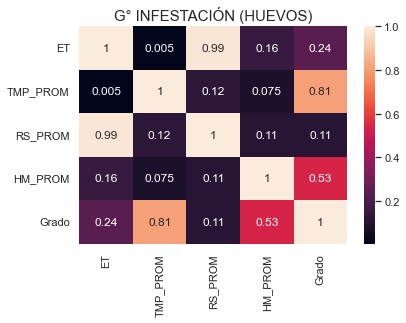

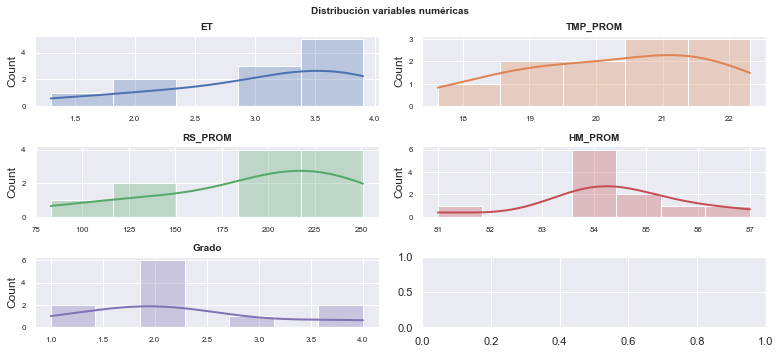

In [20]:
arrPlagas = []
dfFilter = dfFilEleg
arrFiltrados = dfFilEleg['Filtrado'].unique()
#dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    # Filtrar el dataset por las variables que se usarán
                    #df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Grado']]        
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]   
                    
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                    #print(df_union)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.70]

                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                        arrPlagas.append(plaga + ' ' + caracteristica)
                        #Creando Mapa de Calor
                        sns.set()
                        
                        print('------------------------------------------------------------')
                        print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                        print('Plaga: ', plaga)
                        print('Caracteristica: ', caracteristica)      
                        
                        print('------------------------------------------------------------')
                        
                        print(df_union)
                        
                        ax = sns.heatmap(dfCorrelacion, annot = True)
                        iContador = iContador + 1
                        plt.title('{}'.format(caracteristica), fontdict = { 'fontsize' : '15'})
                        #plt.show()
                        
                        # Gráfico de distribución para cada variable numérica
                        # ==============================================================================
                        # Ajustar número de subplots en función del número de columnas

                        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 5))
                        axes = axes.flat
                        columnas_numeric = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']].select_dtypes(include=['float64', 'int']).columns

                        for i, colum in enumerate(columnas_numeric):
                            sns.histplot(
                                data    = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']],
                                x       = colum,
                                stat    = "count",
                                kde     = True,
                                color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                                line_kws= {'linewidth': 2},
                                alpha   = 0.3,
                                ax      = axes[i]
                            )
                            axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
                            axes[i].tick_params(labelsize = 8)
                            axes[i].set_xlabel("")



                        fig.tight_layout()
                        plt.subplots_adjust(top = 0.9)
                        fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

                        plt.show()
                        
                        

In [18]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1006
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  34
Variables X: ['TMP_PROM']



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     27.94
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.78e-05
Time:                        15:36:34   Log-Likelihood:                -35.719
No. Observations:                  27   AIC:                             75.44
Df Residuals:                      25   BIC:                             78.03
Df Model:                           1                          

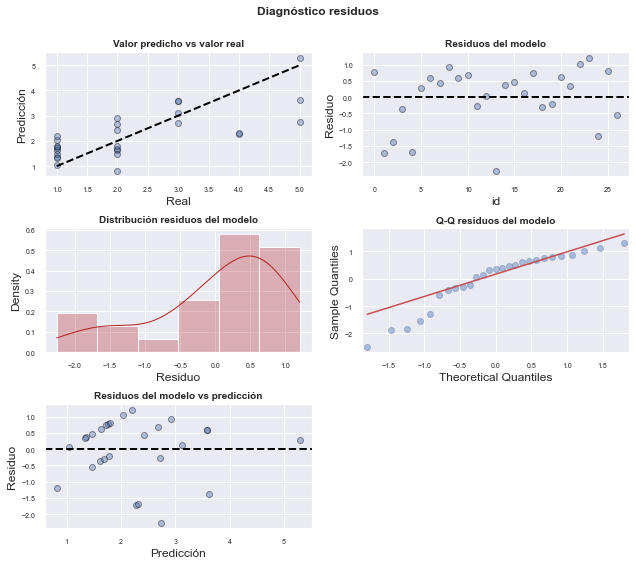


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
18  1.757868  0.204962       1.335740       2.179995     -0.231824   
7   2.279182  0.181730       1.904902       2.653462      0.299090   
3   3.611534  0.313788       2.965275       4.257793      1.562551   
10  1.623156  0.217931       1.174318       2.071994     -0.372373   

    obs_ci_upper  
18      3.747559  
7       4.259274  
3       5.660516  
10      3.618685  

El error (rmse) de test es: 0.9608925510562534



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1007
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  33
Variables X: ['TMP_PROM']



                            OLS Regression Results     

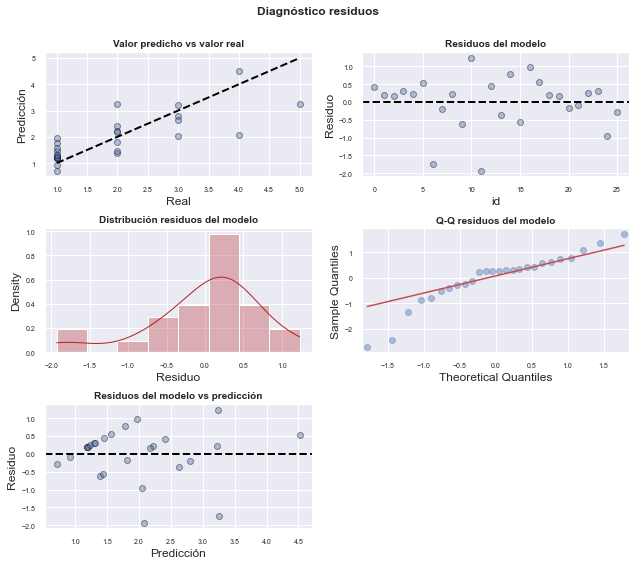


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
27  2.405623  0.163104       2.068992       2.742254      0.839389   
14  1.183737  0.194749       0.781794       1.585679     -0.397821   
13  1.179538  0.195216       0.776633       1.582443     -0.402265   
18  1.295428  0.182889       0.917963       1.672893     -0.280086   

    obs_ci_upper  
27      3.971856  
14      2.765295  
13      2.761341  
18      2.870943  

El error (rmse) de test es: 1.335169350922813



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  34
Variables X: ['TMP_PROM']



                            OLS Regression Results      

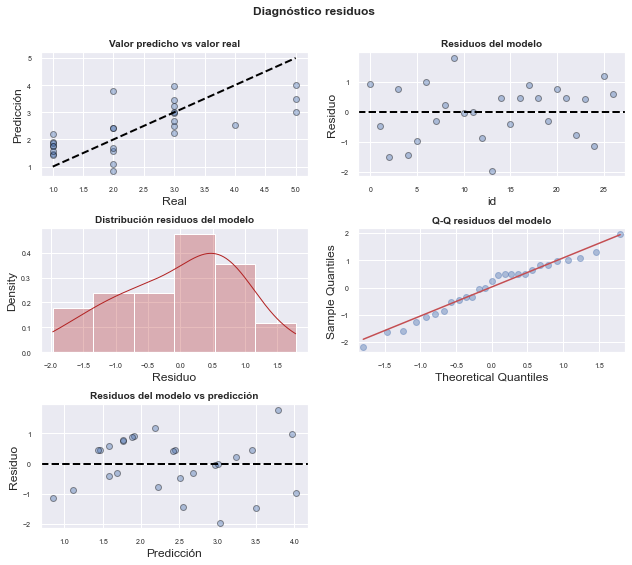


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
18  1.914635  0.208676       1.484858       2.344411     -0.073925   
7   2.505985  0.182595       2.129925       2.882046      0.528339   
3   3.502385  0.292239       2.900507       4.104263      1.469672   
10  1.761825  0.226188       1.295983       2.227668     -0.234840   

    obs_ci_upper  
18      3.903195  
7       4.483632  
3       5.535097  
10      3.758491  

El error (rmse) de test es: 0.9730905239534653



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  34
Variables X: ['TMP_PROM']



                            OLS Regression Results             

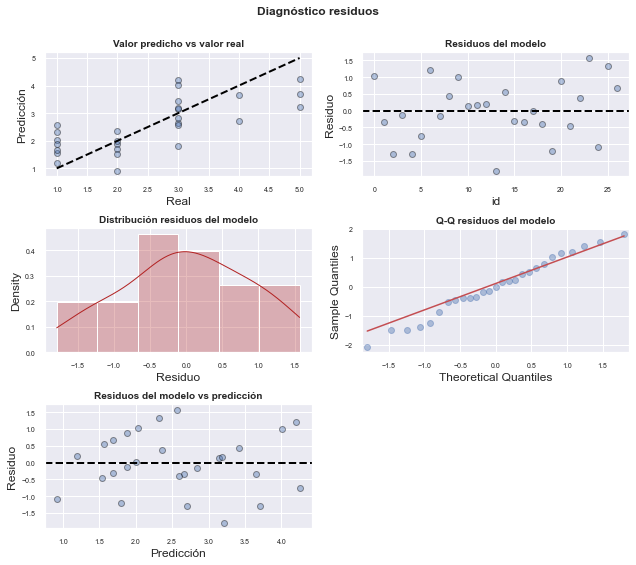


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
18  2.037155  0.198972       1.627364       2.446946      0.141068   
7   2.659260  0.174104       2.300687       3.017833      0.773580   
3   3.707480  0.278649       3.133591       4.281369      1.769294   
10  1.876398  0.215669       1.432219       2.320578     -0.027417   

    obs_ci_upper  
18      3.933242  
7       4.544941  
3       5.645666  
10      3.780214  

El error (rmse) de test es: 1.1999572717462403



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  33
Variables X: ['TMP_PROM']



                            OLS Regression Results     

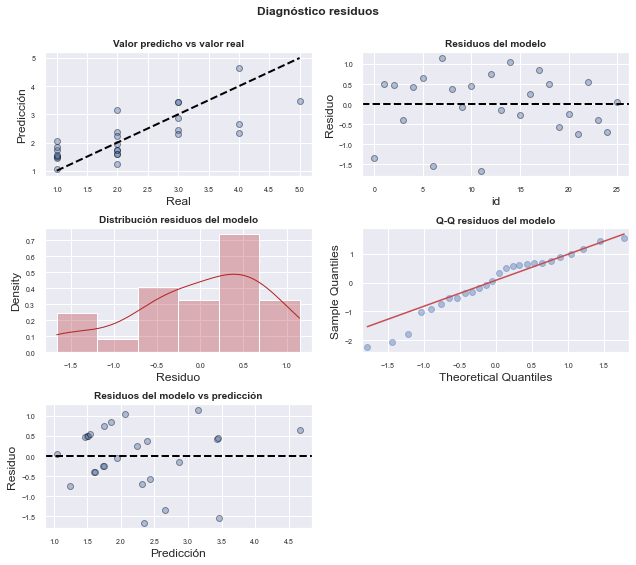


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
27  2.656071  0.171498       2.302116       3.010026      1.010006   
14  1.495236  0.203746       1.074726       1.915747     -0.166413   
13  1.467312  0.207169       1.039738       1.894887     -0.196138   
18  1.601347  0.191431       1.206254       1.996440     -0.054052   

    obs_ci_upper  
27      4.302137  
14      3.156885  
13      3.130763  
18      3.256746  

El error (rmse) de test es: 1.2352492582263197



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  33
Variables X: ['TMP_PROM']



                            OLS Regression Results             

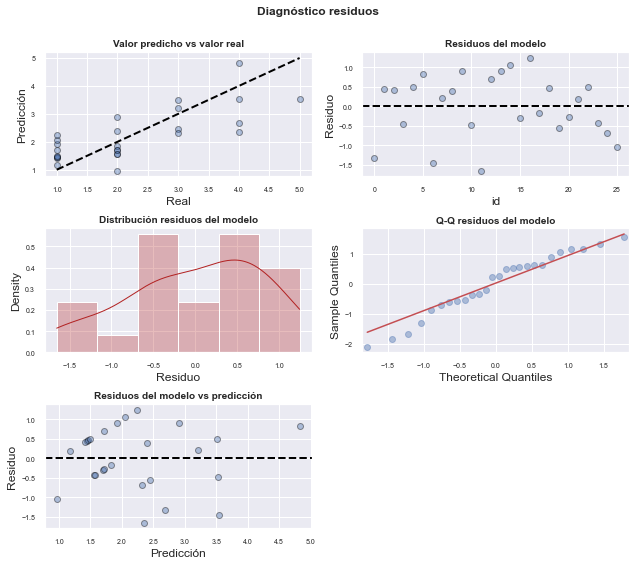


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
27  2.684393  0.180201       2.312476       3.056310      0.954793   
14  1.446256  0.214085       1.004405       1.888106     -0.299718   
13  1.416473  0.217682       0.967199       1.865746     -0.331394   
18  1.559433  0.201145       1.144289       1.974576     -0.179974   

    obs_ci_upper  
27      4.413992  
14      3.192229  
13      3.164339  
18      3.298839  

El error (rmse) de test es: 1.282031606799942



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1028
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  34
Variables X: ['TMP_PROM']



                            OLS Regression Results              

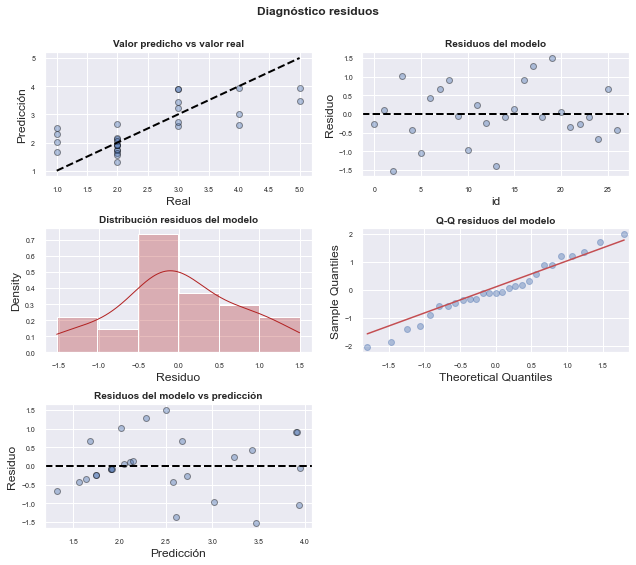


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
18  1.742602  0.209114       1.311924       2.173280      0.075649   
7   2.108487  0.168913       1.760605       2.456370      0.460982   
3   3.475841  0.233967       2.993978       3.957704      1.794936   
10  2.016073  0.177440       1.650629       2.381517      0.364771   

    obs_ci_upper  
18      3.409555  
7       3.755992  
3       5.156746  
10      3.667375  

El error (rmse) de test es: 1.0750420883292173



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1029
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  33
Variables X: ['TMP_PROM']



                            OLS Regression Results     

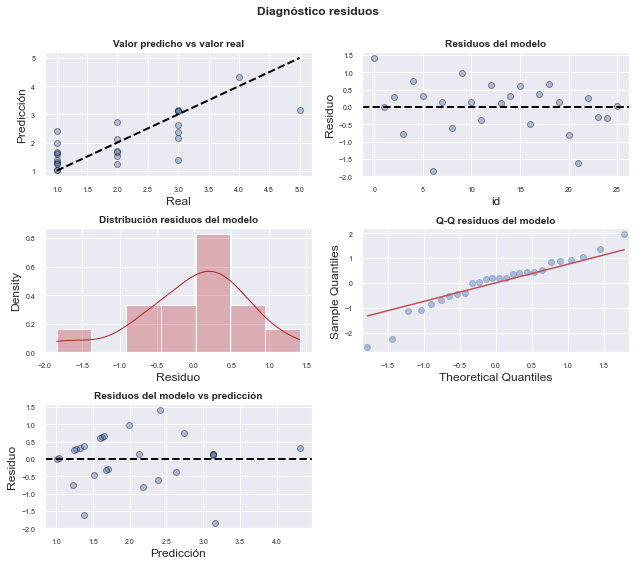


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
27  2.414627  0.161695       2.080904       2.748350      0.832347   
14  1.010012  0.235746       0.523456       1.496569     -0.611400   
13  1.274572  0.200859       0.860019       1.689125     -0.326707   
18  1.231753  0.206167       0.806246       1.657260     -0.372396   

    obs_ci_upper  
27      3.996908  
14      2.631424  
13      2.875851  
18      2.835903  

El error (rmse) de test es: 0.8898475201399775



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1029
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  33
Variables X: ['TMP_PROM']



                            OLS Regression Results             

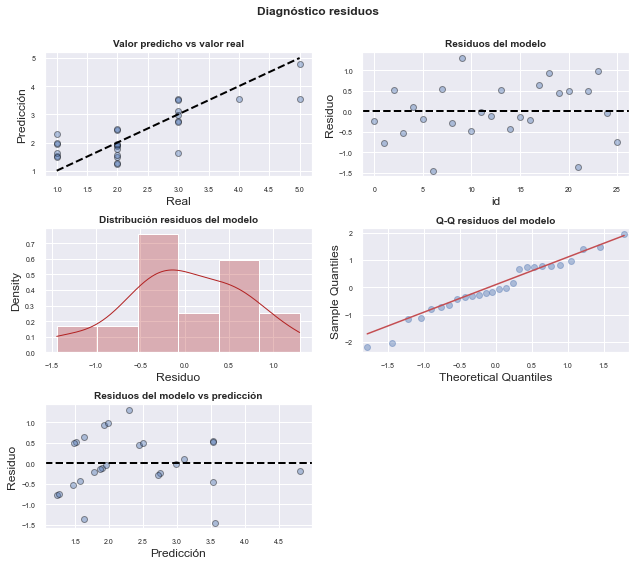


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
27  2.752964  0.148948       2.445551       3.060377      1.295429   
14  1.233922  0.217160       0.785725       1.682119     -0.259660   
13  1.520034  0.185024       1.138164       1.901905      0.044998   
18  1.473727  0.189913       1.081767       1.865688     -0.003953   

    obs_ci_upper  
27      4.210499  
14      2.727504  
13      2.995071  
18      2.951408  

El error (rmse) de test es: 0.9628825644778483



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1010
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  32
Variables X: ['TMP_PROM']



                            OLS Regression Results     

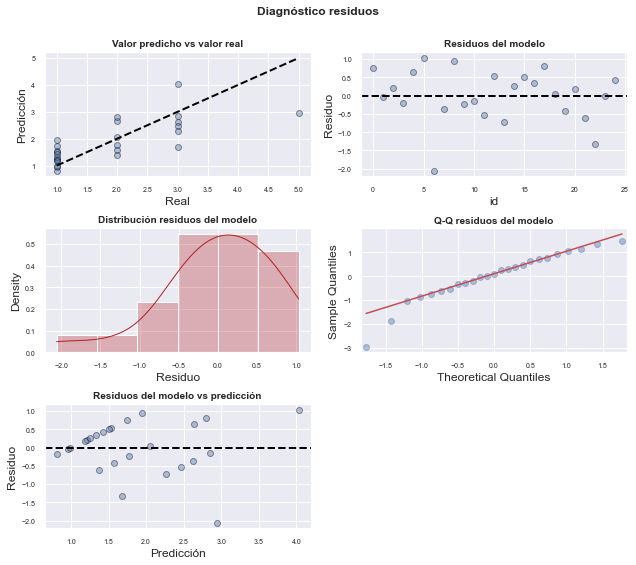


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
23  1.745197  0.147772       1.439507       2.050886      0.209466   
14  0.964810  0.227633       0.493915       1.435705     -0.612138   
13  1.210500  0.193834       0.809525       1.611476     -0.346999   
18  0.810011  0.251118       0.290533       1.329488     -0.782120   

    obs_ci_upper  
23      3.280927  
14      2.541758  
13      2.768000  
18      2.402141  

El error (rmse) de test es: 0.873474933181725



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  30
Variables X: ['TMP_PROM']



                            OLS Regression Results      

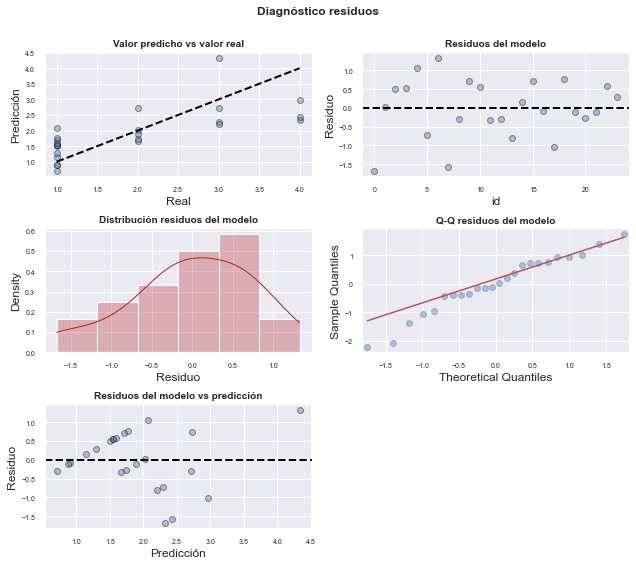


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
3   2.325321  0.182514       1.946810       2.703831      0.645439   
23  2.024625  0.162680       1.687248       2.362002      0.353531   
14  1.506804  0.182633       1.128046       1.885562     -0.173133   
13  1.542731  0.179203       1.171087       1.914376     -0.135617   

    obs_ci_upper  
3       4.005202  
23      3.695719  
14      3.186741  
13      3.221079  

El error (rmse) de test es: 0.9412775810879241



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1016
Plaga:  TRIPS TABACI
Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
Número de datos:  12
Variables X: ['ET', 'RS_PROM']



                            OLS Regression Results                            


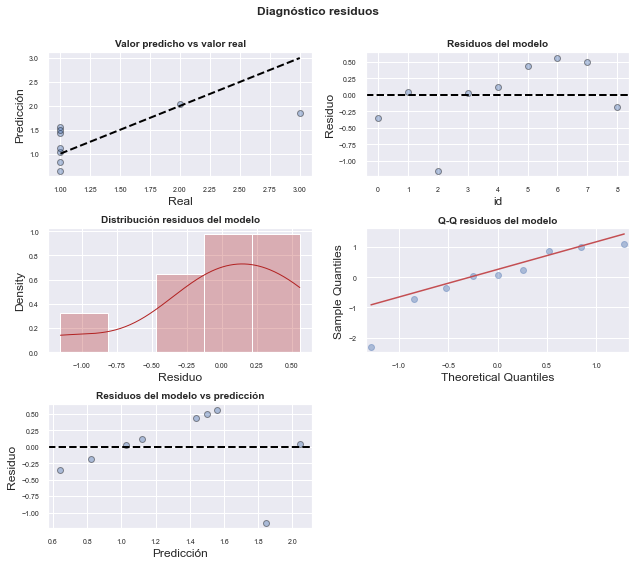


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
2   0.643275  0.395961      -0.325607       1.612156     -1.144782   
9   2.044442  0.390609       1.088657       3.000227      0.263448   
10  1.846191  0.315030       1.075341       2.617042      0.157220   
1   1.027243  0.335055       0.207393       1.847092     -0.684648   

    obs_ci_upper  
2       2.431331  
9       3.825436  
10      3.535163  
1       2.739133  

El error (rmse) de test es: 0.6844565899947631



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1721
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  11
Variables X: ['TMP_PROM']



                            OLS Regression Results       

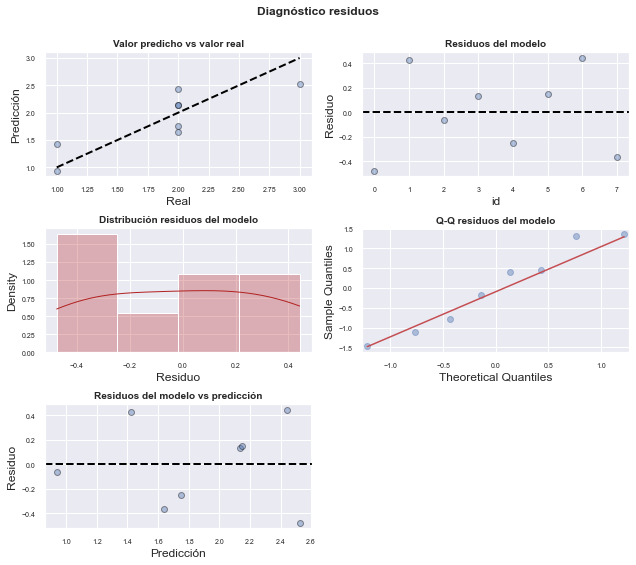


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10  2.524431  0.215790       1.996411       3.052450      1.467193   
1   1.426148  0.177178       0.992610       1.859686      0.412786   
0   0.939000  0.279033       0.256230       1.621770     -0.203420   
7   2.133272  0.148693       1.769435       2.497110      1.147714   

    obs_ci_upper  
10      3.581669  
1       2.439510  
0       2.081419  
7       3.118831  

El error (rmse) de test es: 0.5815286213849064



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1706
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  11
Variables X: ['TMP_PROM']



                            OLS Regression Results       

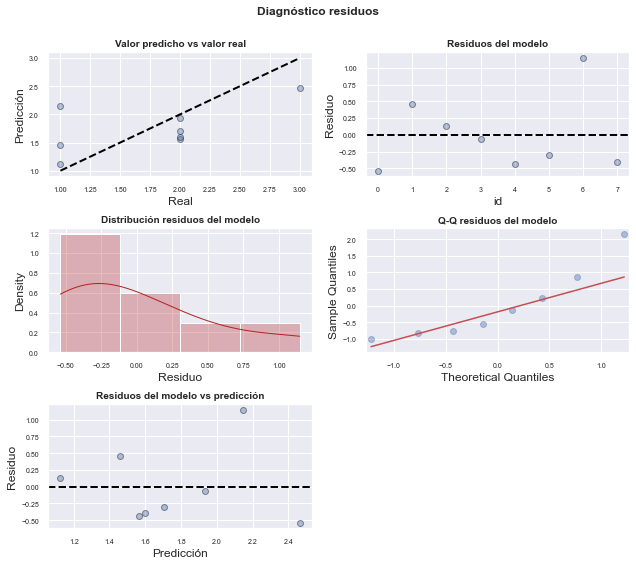


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10  2.463866  0.450392       1.361797       3.565935      0.599916   
1   1.456471  0.271105       0.793102       2.119839     -0.186639   
0   1.125741  0.407706       0.128121       2.123361     -0.678420   
7   1.936545  0.240433       1.348227       2.524862      0.322274   

    obs_ci_upper  
10      4.327815  
1       3.099580  
0       2.929902  
7       3.550815  

El error (rmse) de test es: 0.7083718505576709



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1706
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  11
Variables X: ['TMP_PROM']



                            OLS Regression Results               

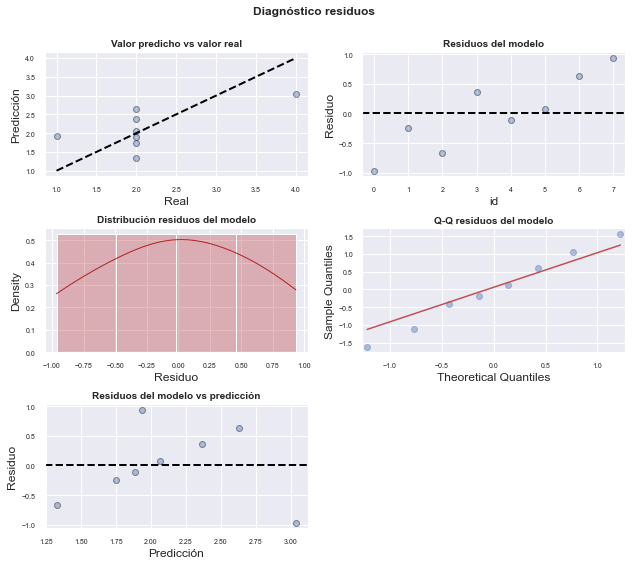


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10  3.036081  0.506386       1.796999       4.275163      0.940399   
1   1.750379  0.304809       1.004538       2.496220     -0.097008   
0   1.328281  0.458393       0.206633       2.449928     -0.700180   
7   2.363080  0.270324       1.701621       3.024539      0.548118   

    obs_ci_upper  
10      5.131763  
1       3.597766  
0       3.356741  
7       4.178042  

El error (rmse) de test es: 0.3507822660971465



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1707
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  11
Variables X: ['TMP_PROM']



                            OLS Regression Results       

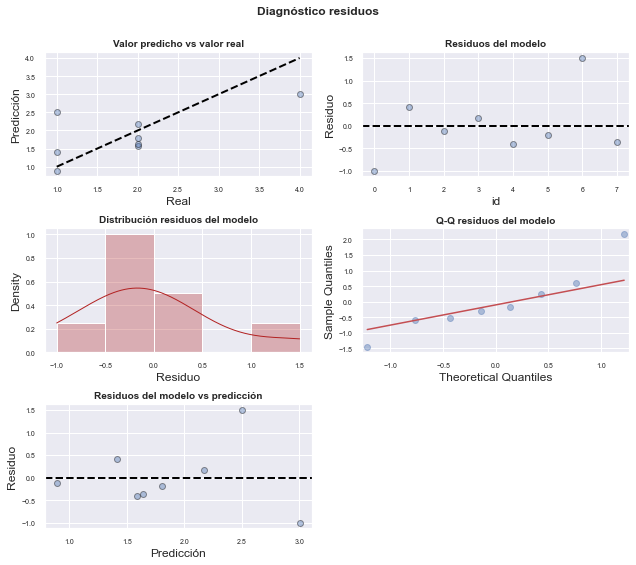


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10  3.001339  0.583385       1.573847       4.428830      0.586996   
1   1.411869  0.351157       0.552618       2.271119     -0.716424   
0   0.890043  0.528094      -0.402158       2.182243     -1.446857   
7   2.169330  0.311428       1.407293       2.931368      0.078393   

    obs_ci_upper  
10      5.415681  
1       3.540161  
0       3.226942  
7       4.260268  

El error (rmse) de test es: 0.43526852984220105



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1707
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  11
Variables X: ['TMP_PROM']



                            OLS Regression Results              

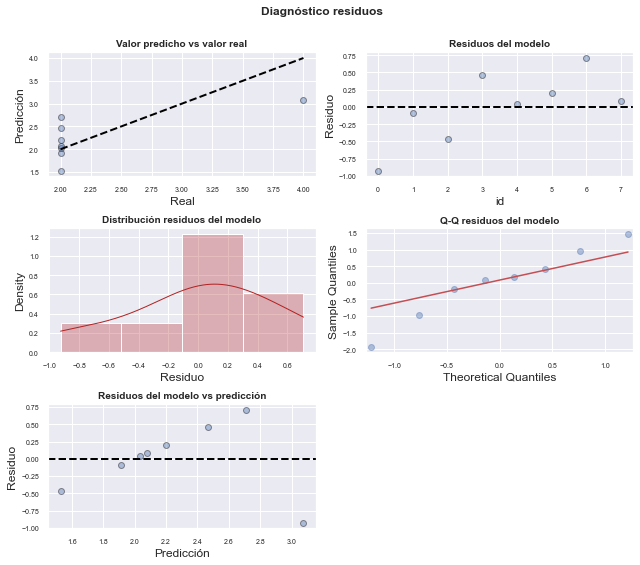


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10  3.074946  0.407100       2.078808       4.071084      1.390160   
1   1.910796  0.245046       1.311190       2.510402      0.425622   
0   1.528603  0.368517       0.626875       2.430332     -0.102142   
7   2.465572  0.217322       1.933803       2.997340      1.006465   

    obs_ci_upper  
10      4.759733  
1       3.395970  
0       3.159349  
7       3.924679  

El error (rmse) de test es: 0.670087997981038



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1708
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  11
Variables X: ['HM_PROM']



                            OLS Regression Results                 

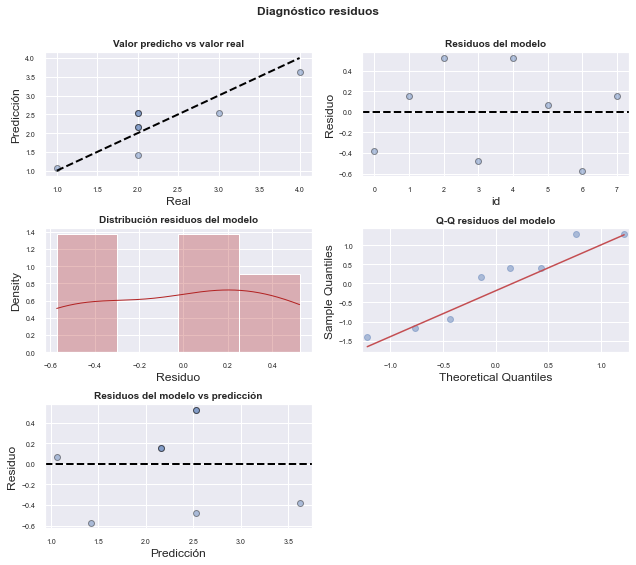


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10  3.619048  0.352081       2.757538       4.480558      2.190395   
1   2.158730  0.165972       1.752610       2.564850      0.948861   
0   2.523810  0.176040       2.093055       2.954565      1.305450   
7   2.523810  0.176040       2.093055       2.954565      1.305450   

    obs_ci_upper  
10      5.047700  
1       3.368599  
0       3.742169  
7       3.742169  


ValueError: shapes (3,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [22]:
arrPlagas = []
dfFilter = dfFilEleg
arrFiltrados = dfFilEleg['Filtrado'].unique()
#dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]        
                                   
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.70]                
                    
                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        arrColumns = dfCorrelacion_index.columns
                        arrColumnsUnion = []
                        ###########################################
                        for column in arrColumns:
                            if (dfCorrelacion_index[column]['Grado'] > 0.70) & (column != 'Grado'):
                                    arrColumnsUnion.append(column)
                        ############################################  
                        
                         #Creando regresión lineal
                        df_union = df_union.drop('Fecha' ,axis=1)
                        df_union = df_union.fillna(df_union.mean())
                       
                      
                        if df_union[arrColumnsUnion].shape[0] > 1:   
                            print('**********************************************************************************************************************')
                            # División de los datos en train y test
                            # ==============================================================================
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)
                            print('Número de datos: ',  df_union[arrColumnsUnion].shape[0])
                            print('Variables X:', arrColumnsUnion)
                            print("\n"*2)
                            
                            X = df_union[arrColumnsUnion]
                            y = df_union['Grado']

                            X_train, X_test, y_train, y_test = train_test_split(
                                                                    X,
                                                                    y.values.reshape(-1,1),
                                                                    train_size   = 0.8,
                                                                    random_state = 1234,
                                                                    shuffle      = True
                                                                )
                            # Creación del modelo utilizando matrices como en scikitlearn
                            # ==============================================================================
                            # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
                            X_train = sm.add_constant(X_train, prepend=True)
                            modelo = sm.OLS(endog=y_train, exog=X_train,)
                            modelo = modelo.fit()
                            print(modelo.summary())
                            
                            print('\n Coeficientes')
                            print(modelo.params)
                            
                            # Intervalos de confianza para los coeficientes del modelo
                            # ==============================================================================
                            intervalos_ci = modelo.conf_int(alpha=0.05)
                            intervalos_ci.columns = ['2.5%', '97.5%']
                            
                            print('\nIntervalos de confianza: ')
                            print(intervalos_ci)
                            
                            
                            print('\n Diagnostico de residuos:')
                            # Diagnóstico errores (residuos) de las predicciones de entrenamiento
                            # ==============================================================================
                            y_train = y_train.flatten()
                            prediccion_train = modelo.predict(exog = X_train)
                            residuos_train   = prediccion_train - y_train
                            
                            # Gráficos
                            # ==============================================================================
                            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

                            axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                                            'k--', color = 'black', lw=2)
                            axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
                            axes[0, 0].set_xlabel('Real')
                            axes[0, 0].set_ylabel('Predicción')
                            axes[0, 0].tick_params(labelsize = 7)

                            axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[0, 1].set_xlabel('id')
                            axes[0, 1].set_ylabel('Residuo')
                            axes[0, 1].tick_params(labelsize = 7)

                            sns.histplot(
                                data    = residuos_train,
                                stat    = "density",
                                kde     = True,
                                line_kws= {'linewidth': 1},
                                color   = "firebrick",
                                alpha   = 0.3,
                                ax      = axes[1, 0]
                            )

                            axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                                                 fontweight = "bold")
                            axes[1, 0].set_xlabel("Residuo")
                            axes[1, 0].tick_params(labelsize = 7)


                            sm.qqplot(
                                residuos_train,
                                fit   = True,
                                line  = 'q',
                                ax    = axes[1, 1], 
                                color = 'firebrick',
                                alpha = 0.4,
                                lw    = 2
                            )
                            axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[1, 1].tick_params(labelsize = 7)

                            axes[2, 0].scatter(prediccion_train, residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
                            axes[2, 0].set_xlabel('Predicción')
                            axes[2, 0].set_ylabel('Residuo')
                            axes[2, 0].tick_params(labelsize = 7)

                            # Se eliminan los axes vacíos
                            fig.delaxes(axes[2,1])

                            fig.tight_layout()
                            plt.subplots_adjust(top=0.9)
                            fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
                            plt.show()
                            
                            # Predicciones con intervalo de confianza 
                            # ==============================================================================
                            predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
                            print('\n Predicciones:')
                            print(predicciones.head(4))
                            
                            # Error de test del modelo 
                            # ==============================================================================
                            X_test = sm.add_constant(X_test, prepend=True)
                            predicciones = modelo.predict(exog = X_test)
                            rmse = mean_squared_error(
                                    y_true  = y_test,
                                    y_pred  = predicciones,
                                    squared = False
                                   )
                            print("")
                            print(f"El error (rmse) de test es: {rmse}")
                            
                            print("\n"*2)
                            print('**********************************************************************************************************************')
                            

In [ ]:
# Lugar: Filtrado 20 - Turno F20 - Lote 2019
# Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
# Caracteristica:  G° INFESTACIÓN (HUEVOS)
# Número de datos:  42
# Variables X: ['TMP_PROM', 'HM_PROM']

In [ ]:
# Lugar: Filtrado 10N - Turno F10N - Lote 1017
# Plaga:  BEMISIA TABACI
# Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
# Número de datos:  30
# Variables X: ['TMP_PROM']

In [ ]:
# Lugar: Filtrado 17 - Turno F17 - Lote 1719
# Plaga:  BEMISIA TABACI
# Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
# Número de datos:  40
# Variables X: ['TMP_PROM']

In [ ]:
# Lugar: Filtrado 17 - Turno F17 - Lote 1719
# Plaga:  BEMISIA TABACI
# Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
# Número de datos:  40
# Variables X: ['TMP_PROM']

In [ ]:
# Lugar: Filtrado 17 - Turno F17 - Lote 1718
# Plaga:  TRIPS TABACI
# Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
# Número de datos:  26
# Variables X: ['TMP_PROM']